In [46]:
import numpy as np
import numpy.random as rand
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib notebook

In [85]:
def g2(Np, N = np.int64(5e7), NT = 100000):
    '''
    Realiza un experimento en el que calcula [tau,g^2_2D,g^2_3D]
    Supone que N (entero) es el número de casillas que dividen a 1 segundo
    NT (entero) es el número promedio fotones en 1 segundo
    Np (entero) es el intervalo de medición, Np >= 1
    SE DEBE CUMPLIR QUE N/Np ES ENTERO
    '''
    fotones_init = np.int32(rand.random(N) < NT/N) #distribución aleatoria inicial de fotones en el intervalo de tiempo
    TR = rand.random(N) < 0.5 #Probabilidad de ser transmitido o reflejado
    detectados = rand.random(N) < 0.05 #Porcentaje de parejas testigo detectadas
    T = fotones_init*(TR)
    R = fotones_init*(~TR)
    G = fotones_init*(detectados)
    
    #Medición de fotones en el intervalo de tiempo 1s/(N/Np)
    L = np.arange(0,N,Np) #Lista de índices con espaciamiento Np
    T_medicion = np.float32(np.sum([T[L+i] for i in range(Np)],axis=0) != 0)
    R_medicion = np.float32(np.sum([R[L+i] for i in range(Np)],axis=0) != 0)
    G_medicion = np.float32(np.sum([G[L+i] for i in range(Np)],axis=0) != 0)
    
    CTR = T_medicion*R_medicion
    CTRG = T_medicion*R_medicion*G_medicion
    CTG = T_medicion*G_medicion
    CRG = R_medicion*G_medicion
    
    tau = Np/N #en segundos
    g2D = np.sum(CTR)/(np.sum(T_medicion)*np.sum(R_medicion))*N/Np
    g3D = np.sum(CTRG)/(np.sum(CTG)*np.sum(CRG))*np.sum(G_medicion)
    return [tau, g2D, g3D]

In [82]:
%%time
#1 EXPERIMENTO DE PRUEBA
NT = 100000 #Numero total de fotones
N = np.int64(5e7) #Número de casillas en 1s
Np = 100 #Intervalo de medición
g2(Np,N,NT)

Wall time: 15.6 s


[2e-06, 1.0060077784146415, 0.30618167]

In [20]:
%%time
#REALIZACIÓN Y ESTADÍSTICA DE 50 EXPERIMENTOS PARA 1 PUNTO
NT = 100000 #Numero total de fotones
N = np.int64(5e7) #Número de casillas en 1s
Np = 100 #Intervalo de medición
N_experimentos = 50
Experimentos = np.zeros((N_experimentos,3))
for i in range(N_experimentos):
    Experimentos[i] = g2(Np,N,NT)
dataset = pd.DataFrame({'tau': Experimentos[:, 0], 'g2D': Experimentos[:, 1], 'g3D': Experimentos[:, 2]})

Wall time: 13min 39s


In [33]:
dataset.mean()

tau    0.000002
g2D    0.992959
g3D    0.310842
dtype: float64

In [34]:
dataset.std()

tau    1.711265e-21
g2D    1.084589e-02
g3D    1.372887e-02
dtype: float64

In [124]:
%%time
#REALIZACIÓN Y ESTADÍSTICA DE 50 EXPERIMENTOS PARA VARIOS INTERVALOS DE MEDICIÓN Np
NT = 100000 #Numero total de fotones
N = np.int64(5e7) #Número de casillas en 1s
Experimentos_tot = []
Resultados = []
N_experimentos = 4
for Np in [25,40,50,80,100,200,250,400,500,625,800,1000]: #Lista de Np que se van a usar (todas dividen a N)
    Experimentos = np.zeros((N_experimentos,3))
    for i in range(N_experimentos):
        Experimentos[i] = g2(Np,N,NT)
    Experimentos_tot.append(Experimentos)
    dataset = pd.DataFrame({'tau': Experimentos[:, 0], 'g2D': Experimentos[:, 1], 'g3D': Experimentos[:, 2]})
    mean = dataset.mean()
    sigma = dataset.std()
    Resultados.append([mean['tau'],sigma['tau'],mean['g2D'],sigma['g2D'],mean['g3D'],sigma['g3D']])
Resultados = np.array(Resultados).T

Wall time: 13min


<IPython.core.display.Javascript object>


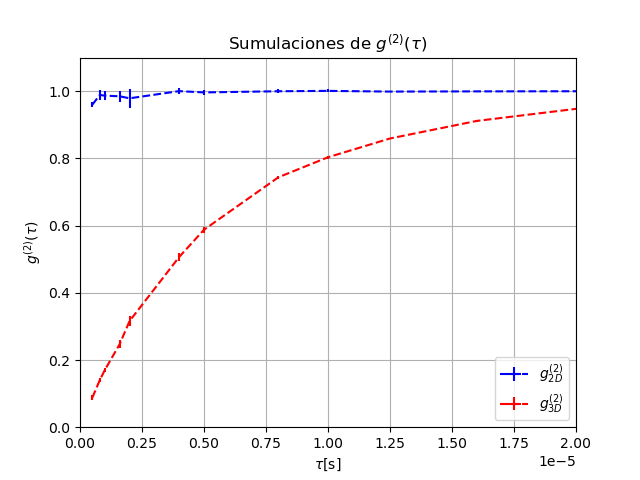

In [130]:
plt.errorbar(Resultados[0],Resultados[2],Resultados[3],5E-9,label=r'$g^{(2)}_{2D}$',fmt='b--')
plt.errorbar(Resultados[0],Resultados[4],Resultados[5],5E-9,label=r'$g^{(2)}_{3D}$',fmt='r--')
plt.xlim(0,2E-5)
plt.ylim(0,1.1)
#plt.xscale('log')
plt.title(r'Sumulaciones de $g^{(2)}(\tau)$')
plt.xlabel(r'$\tau$[s]')
plt.ylabel(r'$g^{(2)}(\tau)$')
plt.legend()
plt.grid()
plt.show()

In [79]:
Resultados

array([[1.00000000e-06, 2.00000000e-06, 4.00000000e-06],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [9.80339323e-01, 9.92913783e-01, 1.00131817e+00],
       [2.65684736e-02, 1.90785934e-02, 4.29793041e-03],
       [1.71592988e-01, 3.02412733e-01, 5.03763601e-01],
       [1.44246466e-02, 1.26623819e-02, 7.74557323e-03]])